# BankNote Classification with ML
## In This Project I'm going to,
### Import Libraries
### Statistic Plots
### Class value resample
### Correlation Heatmap
### Train Test split
### Decision Tree
### Random Forest
### XGBoost
### Logistic Regression
### Visualize Accuracy Score
### ROC curve
### Feature Importance

In [133]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style='darkgrid',palette='pastel', color_codes=True)


In [134]:
df = pd.read_csv("BankNoteAuthentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


<Axes: xlabel='variance'>

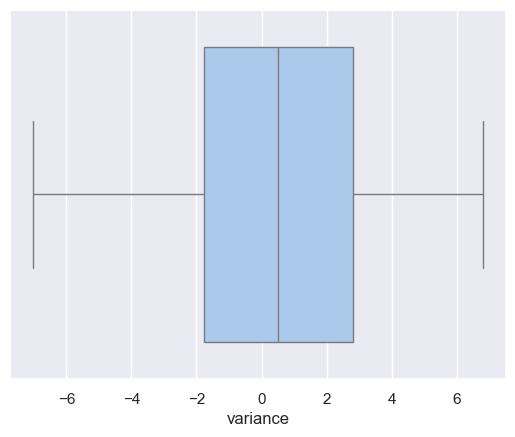

In [135]:
sns.boxplot(x=df['variance'])

<Axes: xlabel='skewness'>

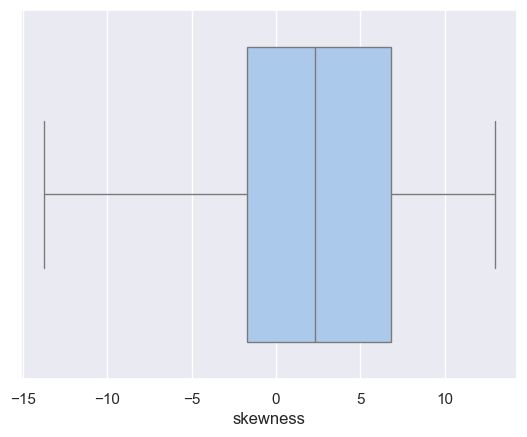

In [136]:
sns.boxplot(x=df['skewness'])

<Axes: xlabel='curtosis'>

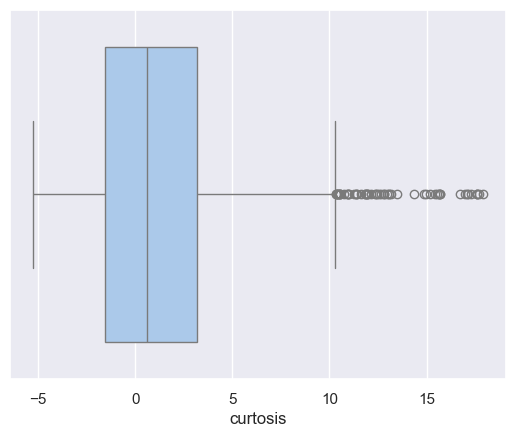

In [137]:
sns.boxplot(x=df['curtosis'])

<Axes: xlabel='entropy'>

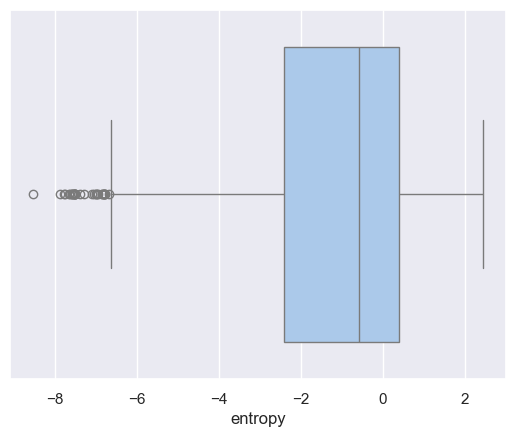

In [138]:
sns.boxplot(x=df['entropy'])

In [139]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis=1)]
data_clean.shape

(1336, 5)

class
0    751
1    585
Name: count, dtype: int64

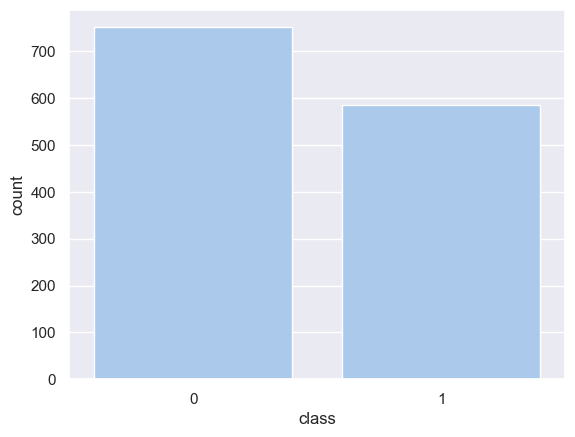

In [140]:
# count 1 and 0 value in class column

sns.countplot(x=data_clean['class'])
data_clean['class'].value_counts()

In [141]:
from sklearn.utils import resample

#create two diffrent dataframe of majority and minority class
df_majority = data_clean[(data_clean['class'] == 0)]
df_minority = data_clean[(data_clean['class'] == 1)]

#upsample minority class 
df_minority_upsampled = resample(df_minority, replace=True,  # sample with replacemnet
                                 n_samples=751, # to match majority class
                                 random_state=42)

# Combine majority class with upsampled minority class
data_clean2 = pd.concat([df_minority_upsampled, df_majority])

class
1    751
0    751
Name: count, dtype: int64

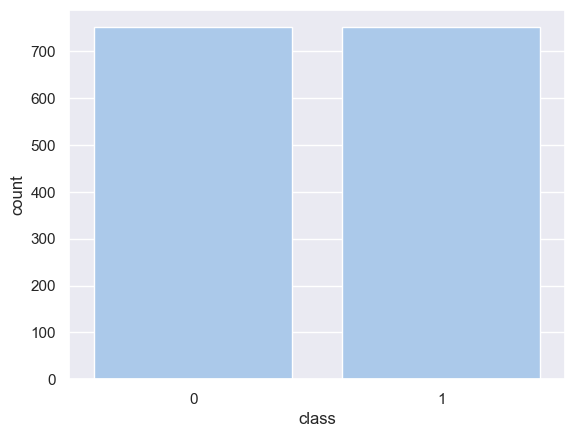

In [142]:
sns.countplot(x=data_clean2['class'])
data_clean2['class'].value_counts()

<Axes: >

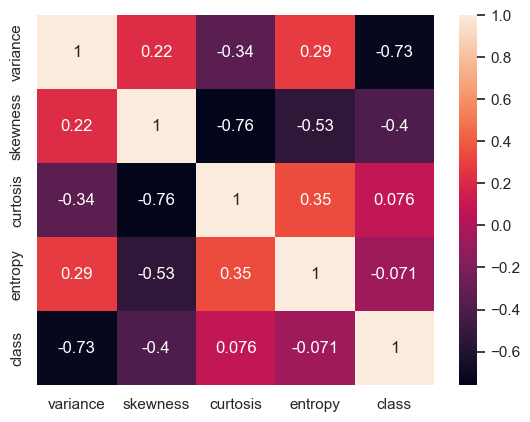

In [143]:
sns.heatmap(data_clean2.corr(), annot=True)

In [144]:
X =data_clean2.drop('class', axis=1)
y=data_clean2['class']
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)
from sklearn.metrics import accuracy_score

# Decision Tree Model

In [145]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [146]:
y_pred = dtree.predict(X_test)
print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100, 2),"%")

Accuracy Score: 98.01 %


# Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [148]:
y_pred = rfc.predict(X_test)
print("Accuracy Score:", round(accuracy_score(y_test, y_pred)*100,2),'%')

Accuracy Score: 99.34 %


# XGBoost

In [149]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [150]:
y_pred = xgb.predict(X_test)
print('Accuracy Score:', round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score: 99.34 %


# Logistic Regression 

In [151]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [152]:
y_pred =lr.predict(X_test)
print('Accuracy Score:', round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score: 99.67 %


# Visualize XGBoost

Text(0.5, 1.0, 'Accuracy Score: 99.33554817275747')

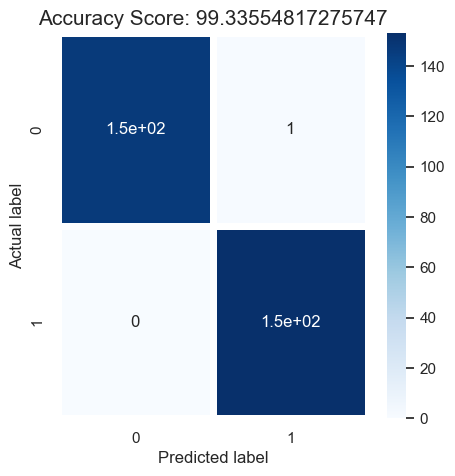

In [153]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=5, annot=True,cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb.score(X_test, y_test)*100)
plt.title(all_sample_title, size=15)

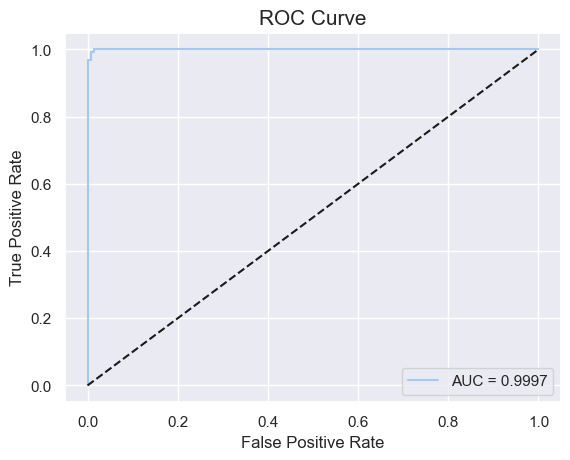

In [154]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

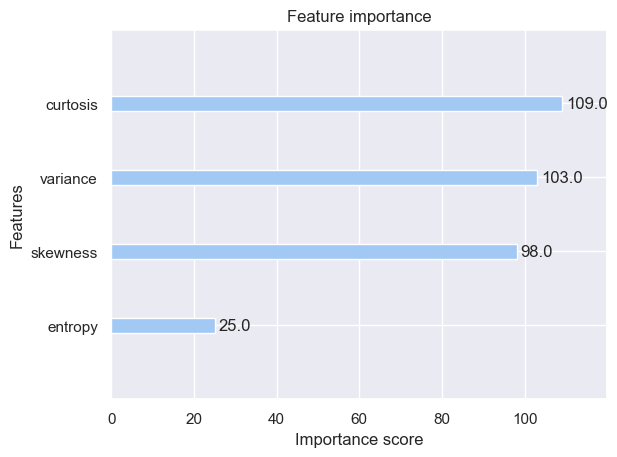

<Figure size 3000x4500 with 0 Axes>

In [155]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb)
plt.figure(figsize=(30,45))
pyplot.show()